In [63]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt

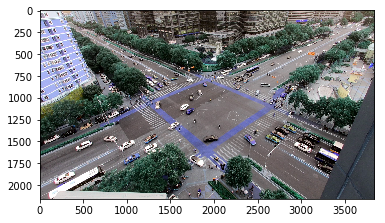

In [64]:
ROOT_DIR = os.path.abspath('../find_cross_pattern/')
IMG_DIR = os.path.join(ROOT_DIR,'pics\\')
IMG_PATH = os.path.join(IMG_DIR,'shadow.jpg')

img = cv2.imread(IMG_PATH,1)

[x,y,z]=img.shape
scale = 1
img=cv2.resize(img,(int(y/scale),int(x/scale)),interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [65]:
#提取的颜色区间

#橙色
#0-8
orange_h_low = 0/2
orange_h_high =8/2

#36-46
orange_s_low = 36 * 255 / 100
orange_s_high = 46 * 255 / 100

#66-76
orange_v_low = 66 * 255 / 100
orange_v_high = 76 * 255 / 100

#白色
white_h_low = 0/2
white_h_high = 360/2

white_s_low = 0 * 255 / 100
white_s_high = 12 * 255 / 100

white_v_low = 87 * 255 / 100
white_v_high = 100 * 255 / 100

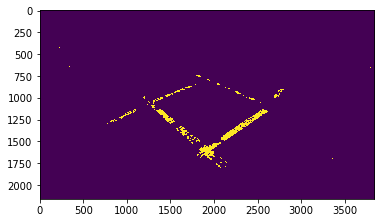

In [66]:
#转成hsv根据颜色提取有效区域
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
white_hsv_img = hsv_img

orange_lower_bound = np.array([orange_h_low , orange_s_low , orange_v_low])
orange_upper_bound = np.array([orange_h_high , orange_s_high , orange_v_high])

white_lower_bound = np.array([white_h_low , white_s_low , white_v_low])
white_upper_bound = np.array([white_h_high , white_s_high , white_v_high])

hsv_img = cv2.inRange(hsv_img, orange_lower_bound,orange_upper_bound)
white_hsv_img = cv2.inRange(white_hsv_img, white_lower_bound,white_upper_bound)

#plt.subplot(121),plt.imshow(hsv_img)
#plt.subplot(122),plt.imshow(white_hsv_img)
plt.imshow(hsv_img)

In [67]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray)

In [68]:
blur_bar = 0
th1_bar = 19
th2_bar = 34
hough_bar = 2
hough2_bar = 0

blur_max = 30
th1_max = 50
th2_max = 50
hough_max = 20
hough2_max = 25

pairs = []

blur_bar2 = 0
th1_bar2 = 19
th2_bar2 = 34
hough_bar2 = 2
hough2_bar2 = 0

blur_max2 = 30
th1_max2 = 50
th2_max2 = 50
hough_max2 = 20
hough2_max2 = 25

pairs2 = []

In [69]:
#th1 = 19
#th2 = 34
#blur = 5
#blur_img = cv2.GaussianBlur(gray, (blur, blur), 0)
#canny = cv2.Canny(blur_img, th1, th2)
#plt.imshow(canny)

In [70]:
def do_some_change(x):
    print ('change')
    
    pairs = []
    #blur = cv2.getTrackbarPos('blur', 'res') * 2 + 1
    th1 = cv2.getTrackbarPos('th1', 'res') * 10
    th2 = cv2.getTrackbarPos('th2', 'res') * 10
    hough = cv2.getTrackbarPos('hough', 'res') * 25
    hough2 = cv2.getTrackbarPos('hough2', 'res') * 1
    
    #pairs2 = []
    #blur2 = cv2.getTrackbarPos('blur', 'res2') * 2 + 1
    #th12 = cv2.getTrackbarPos('th1', 'res2') * 10
    #th22 = cv2.getTrackbarPos('th2', 'res2') * 10
    #hough2 = cv2.getTrackbarPos('hough', 'res2') * 25
    #hough22 = cv2.getTrackbarPos('hough2', 'res2') * 1
    
    cnt = 0

    
    #blur_img = cv2.GaussianBlur(gray, (blur, blur), 0)
    canny = cv2.Canny(hsv_img, th1, th2)
    #canny = cv2.Canny(blur_img, th1, th2)
    dst = cv2.bitwise_and(img, img, mask=canny)

    lines = cv2.HoughLines(canny, 1, np.pi / 180, hough+hough2)
    print (lines.shape)
    for line in lines:
        rho, theta = tuple(line[0])
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 4000*(-b))
        y1 = int(y0 + 4000*(a))
        x2 = int(x0 - 4000*(-b))
        y2 = int(y0 - 4000*(a)) 
        pair = [x1,y1,x2,y2]
        pairs.append(pair)
        cv2.line(dst, (x1,y1), (x2,y2), (255,0,0), 1)
        cv2.circle(dst, (x0, y0), 3, (0, 0, 255), -1)
        cnt = cnt + 1

    sacle = 1
    small = cv2.resize(dst, (int(dst.shape[1] / sacle), int(dst.shape[0] / sacle)), interpolation=cv2.INTER_CUBIC)
    print(cnt)
    cv2.imshow('res', small)
    

In [71]:
cv2.namedWindow('res',0)

#cv2.createTrackbar('blur', 'res', blur_bar, blur_max, do_some_change)
cv2.createTrackbar('th1', 'res', th1_bar, th1_max, do_some_change)
cv2.createTrackbar('th2', 'res', th2_bar, th2_max, do_some_change)
cv2.createTrackbar('hough', 'res', hough_bar, hough_max, do_some_change)
cv2.createTrackbar('hough2', 'res', hough2_bar, hough2_max, do_some_change)
#cv2.createTrackbar('h_low', 'res', h_low_bar, h_low_max, do_some_change)
#cv2.createTrackbar('h_high', 'res', h_high_bar, h_high_max, do_some_change)
#cv2.createTrackbar('s_low', 'res', s_low_bar, s_low_max, do_some_change)
#cv2.createTrackbar('s_high', 'res', s_high_bar, s_high_max, do_some_change)
#cv2.createTrackbar('v_low', 'res', v_low_bar, v_low_max, do_some_change)
#cv2.createTrackbar('v_high', 'res', v_high_bar, v_high_max, do_some_change)

In [72]:
do_some_change(0)
while True:
    key = cv2.waitKey(10) & 0xFF
    if key == 27:
        break
    elif key == 113 or key == 97:
        tmp = cv2.getTrackbarPos('blur', 'res')
        tmp = tmp + 1 if key == 113 else tmp - 1
        tmp = max(min(tmp, blur_max), 0)
        cv2.setTrackbarPos('blur', 'res', tmp)
    elif key == 119 or key == 115:
        tmp = cv2.getTrackbarPos('th1', 'res')
        tmp = tmp + 1 if key == 119 else tmp - 1
        tmp = max(min(tmp, th1_max), 0)
        cv2.setTrackbarPos('th1', 'res', tmp)
    elif key == 101 or key == 100:
        tmp = cv2.getTrackbarPos('th2', 'res')
        tmp = tmp + 1 if key == 101 else tmp - 1
        tmp = max(min(tmp, th2_max), 0)
        cv2.setTrackbarPos('th2', 'res', tmp)
    elif key == 114 or key == 102:
        tmp = cv2.getTrackbarPos('hough', 'res')
        tmp = tmp + 1 if key == 114 else tmp - 1
        tmp = max(min(tmp, hough_max), 0)
        cv2.setTrackbarPos('hough', 'res', tmp)
    elif key != 255:
        print (key)
cv2.destroyAllWindows()

change
(1456, 1, 2)
1456
change
(12, 1, 2)
12
change
(1456, 1, 2)
1456
change
(12, 1, 2)
12
change
(11, 1, 2)
11
change
(10, 1, 2)
10
change
(9, 1, 2)
9
change
(8, 1, 2)
8
change
(8, 1, 2)
8
change
(8, 1, 2)
8
change
(8, 1, 2)
8
